<a href="https://colab.research.google.com/github/niteshydv01/Edge-AI-Accelerated-Data-Science/blob/main/A_well_Known_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Smoothing
means filters,gaussian filters(mean weighted filter),binomial filter,alpha-trimmed mean(mean of fews values in the window),median.

Some more:max filter(removing pepper noise,ignores low pixels),min filters(removing salt noise..ignore high pixels).

sobel:
      1 2 1.      
      0 0 0
      -1 -2 -1

prewitt: 1 1 1
         0 0 0        
         -1 -1 -1    

  kirsch: -3 -3 -3
          -3 0 -3
          5 5 5

 roberts cross: 1 0
                0 -1


#Generating binomial filter
full convolution

full convoltion is not used when we smooth image or find edge.

#implement sobel filter

In [ ]:
## applying sobel filter
import numpy
from time import time
import cv2

def filter2d(image, filt):
    M,N = image.shape
    Mf, Nf = filt.shape
    Mf2 = Mf//2
    Nf2=Nf//2
    result= numpy.zeros_like(image)

    for i in range (Mf2, M-Mf2):
        for j in range (Nf, N-Nf2):
            num = 0.0
            t= image[i-Mf2:i+Mf2+1, j-Nf2:j+Nf2+1]
            num=numpy.sum(numpy.multiply(t,filt))

            result[i, j]=num
    return result

from numba import double, jit

fast_filter2d = jit(double[:,:](double[:,:], double[:,:]))(filter2d)

tic=time()
image=cv2.imread("/content/dark.png",cv2.IMREAD_GRAYSCALE)


filt = numpy.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])


res= fast_filter2d(image, filt)

toc=time()
print(toc-tic)

TypeError: No matching definition for argument type(s) array(uint8, 2d, C), array(int64, 2d, C)

Time taken for JIT-compiled filter2d: 0.3853 seconds


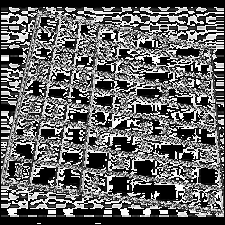

In [ ]:
import numpy as np
from time import time
import cv2
from numba import jit
from google.colab.patches import cv2_imshow  # Import this for displaying images in Colab

# Function to apply a 2D filter to an image
def filter2d(image, filt):
    M, N = image.shape  # Get the dimensions of the image
    Mf, Nf = filt.shape  # Get the dimensions of the filter
    Mf2 = Mf // 2  # Half size of the filter (for padding)
    Nf2 = Nf // 2  # Half size of the filter (for padding)
    result = np.zeros_like(image)  # Initialize the result with zeros

    # Apply filter
    for i in range(Mf2, M - Mf2):
        for j in range(Nf2, N - Nf2):  # Corrected range for j
            # Extract the region of interest (ROI)
            t = image[i - Mf2:i + Mf2 + 1, j - Nf2:j + Nf2 + 1]
            # Convolution operation
            result[i, j] = np.sum(t * filt)

    return result

# Use Numba's JIT to compile the function for faster performance
fast_filter2d = jit(nopython=True)(filter2d)

# Main execution
if __name__ == "__main__":
    # Load an image in grayscale
    image = cv2.imread("/content/images (1).jpeg", cv2.IMREAD_GRAYSCALE)

    # Define Sobel filter for edge detection (vertical edges)
    sobel_filter = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

    # Measure the time for the JIT-compiled function
    tic = time()
    result = fast_filter2d(image, sobel_filter)
    toc = time()

    # Print the time taken
    print(f"Time taken for JIT-compiled filter2d: {toc - tic:.4f} seconds")

    # Display the result using cv2_imshow (for Google Colab)
    cv2_imshow(result)


Time taken with Numba optimization: 0.5836710929870605


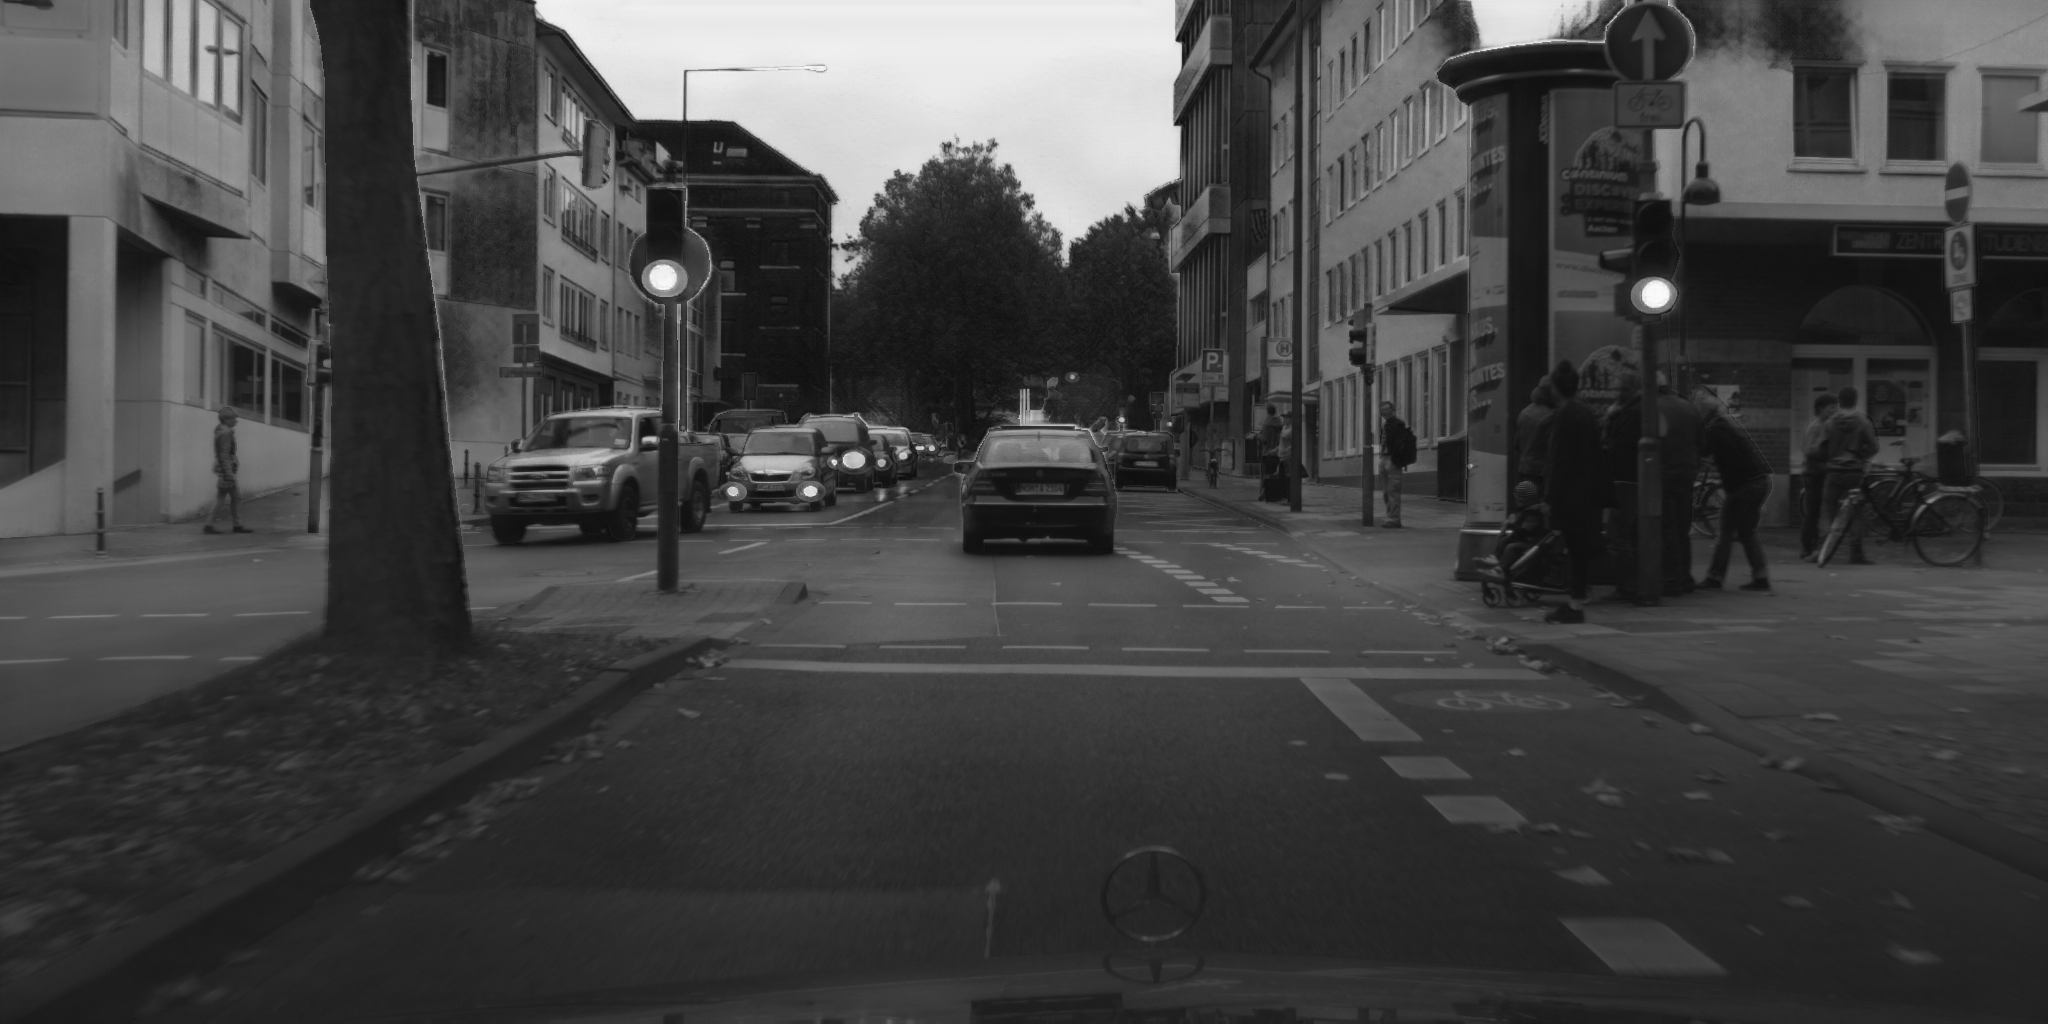

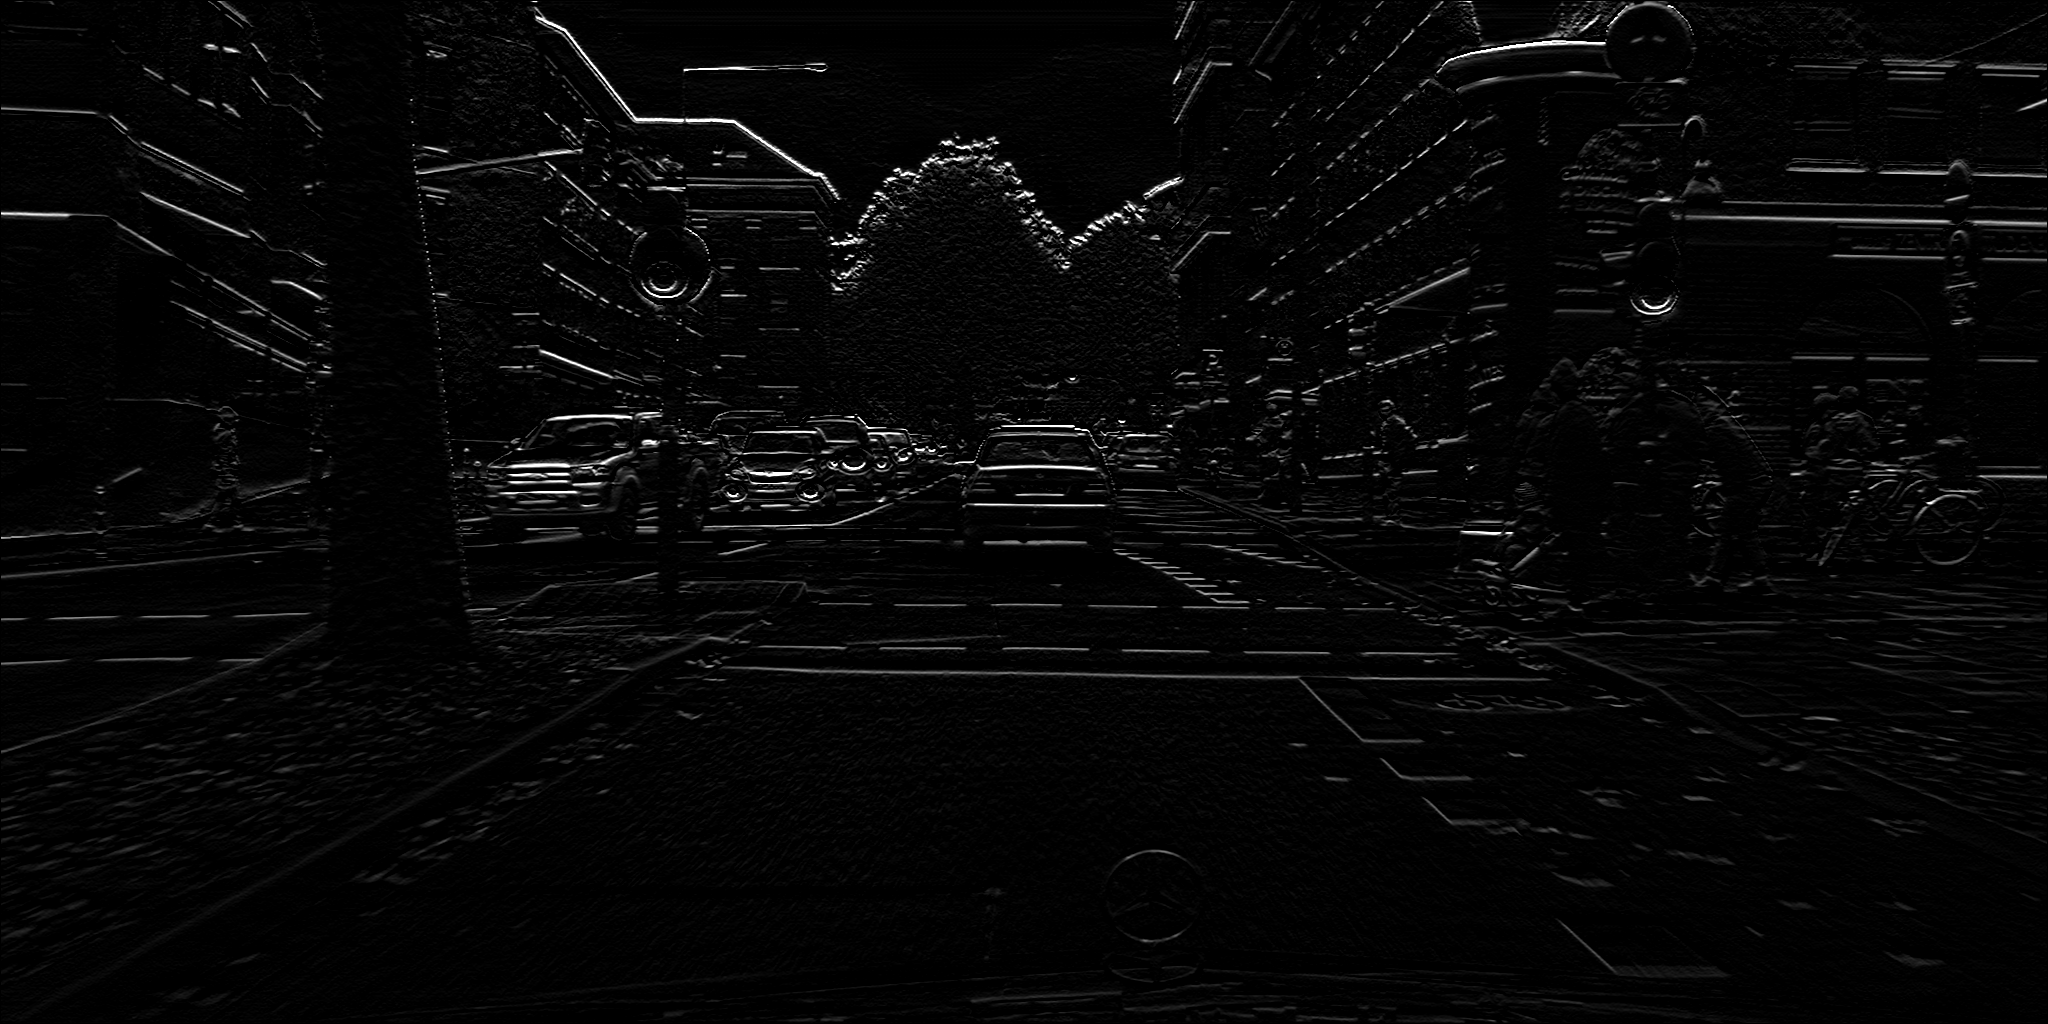

In [ ]:
import numpy as np
from time import time
import cv2
from numba import jit
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

# Define the 2D filter function
def filter2d(image, filt):
    M, N = image.shape
    Mf, Nf = filt.shape
    Mf2 = Mf // 2
    Nf2 = Nf // 2
    result = np.zeros_like(image)

    # Apply filter using convolution
    for i in range(Mf2, M - Mf2):
        for j in range(Nf2, N - Nf2):
            t = image[i - Mf2:i + Mf2 + 1, j - Nf2:j + Nf2 + 1]
            num = np.sum(np.multiply(t, filt))
            result[i, j] = num
    return result

# Optimize with Numba's JIT compilation
@jit(nopython=True)
def fast_filter2d(image, filt):
    M, N = image.shape
    Mf, Nf = filt.shape
    Mf2 = Mf // 2
    Nf2 = Nf // 2
    result = np.zeros_like(image)

    # Apply filter using convolution
    for i in range(Mf2, M - Mf2):
        for j in range(Nf2, N - Nf2):
            t = image[i - Mf2:i + Mf2 + 1, j - Nf2:j + Nf2 + 1]
            num = np.sum(np.multiply(t, filt))
            result[i, j] = num
    return result

# Read the image and convert to grayscale
image = cv2.imread("/content/dark.png", cv2.IMREAD_GRAYSCALE)

# Convert the image to float64 for compatibility with Numba
image = image.astype(np.float64)

# Define the Sobel filter for edge detection
filt = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float64)

# Measure the time taken for the optimized filter function
tic = time()
res = fast_filter2d(image, filt)
toc = time()

# Print the time taken for filtering
print("Time taken with Numba optimization:", toc - tic)

# Convert the result back to uint8 for display purposes
res = np.clip(res, 0, 255).astype(np.uint8)

# Display the original and processed images using cv2_imshow
cv2_imshow(image.astype(np.uint8))
cv2_imshow(res)



#max filter

Time taken for JIT-compiled max filter: 0.8285 seconds


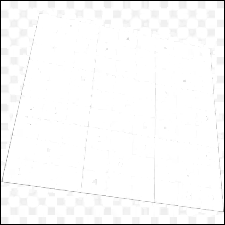

In [ ]:
import numpy as np
from time import time
import cv2
from numba import jit
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

# Function to apply a max filter to an image
def max_filter2d(image, filter_size):
    M, N = image.shape  # Get the dimensions of the image
    Mf, Nf = filter_size, filter_size  # Filter size (assumed to be square)
    Mf2 = Mf // 2  # Half size of the filter (for padding)
    Nf2 = Nf // 2  # Half size of the filter (for padding)
    result = np.zeros_like(image)  # Initialize the result with zeros

    # Apply max filter
    for i in range(Mf2, M - Mf2):
        for j in range(Nf2, N - Nf2):
            # Extract the region of interest (ROI)
            t = image[i - Mf2:i + Mf2 + 1, j - Nf2:j + Nf2 + 1]
            # Find the maximum value in the ROI
            result[i, j] = np.max(t)

    return result

# Use Numba's JIT to compile the function for faster performance
fast_max_filter2d = jit(nopython=True)(max_filter2d)

# Main execution
if __name__ == "__main__":
    # Load an image in grayscale
    image = cv2.imread("/content/images (1).jpeg", cv2.IMREAD_GRAYSCALE)

    # Define the filter size (e.g., 3x3)
    filter_size = 3

    # Measure the time for the JIT-compiled function
    tic = time()
    result = fast_max_filter2d(image, filter_size)
    toc = time()

    # Print the time taken
    print(f"Time taken for JIT-compiled max filter: {toc - tic:.4f} seconds")

    # Display the result using cv2_imshow (for Google Colab)
    cv2_imshow(result)


In [ ]:
#num=max(t) or min(t)
            # num= sort(t),take mean(sorted([a:-a])) for alpha(a)

Time taken for JIT-compiled alpha-trimmed mean filter: 2.3076 seconds


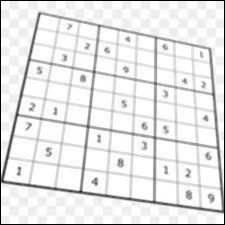

In [ ]:
import numpy as np
from time import time
import cv2
from numba import jit
from google.colab.patches import cv2_imshow  # Import for displaying images in Colab

# Function to apply an alpha-trimmed mean filter to an image
def alpha_trimmed_mean_filter(image, filter_size, alpha):
    M, N = image.shape  # Get the dimensions of the image
    Mf, Nf = filter_size, filter_size  # Filter size (assumed to be square)
    Mf2 = Mf // 2  # Half size of the filter (for padding)
    Nf2 = Nf // 2  # Half size of the filter (for padding)
    result = np.zeros_like(image)  # Initialize the result with zeros

    # Number of pixels to trim (both sides)
    d = 2 * alpha

    # Apply alpha-trimmed mean filter
    for i in range(Mf2, M - Mf2):
        for j in range(Nf2, N - Nf2):
            # Extract the region of interest (ROI)
            t = image[i - Mf2:i + Mf2 + 1, j - Nf2:j + Nf2 + 1].flatten()
            # Sort the pixels
            t_sorted = np.sort(t)
            # Trim the alpha smallest and largest values
            t_trimmed = t_sorted[alpha:len(t_sorted) - alpha]
            # Compute the mean of the trimmed array
            result[i, j] = np.mean(t_trimmed)

    return result

# Use Numba's JIT to compile the function for faster performance
fast_alpha_trimmed_mean_filter = jit(nopython=True)(alpha_trimmed_mean_filter)

# Main execution
if __name__ == "__main__":
    # Load an image in grayscale
    image = cv2.imread("/content/images (1).jpeg", cv2.IMREAD_GRAYSCALE)

    # Define the filter size (e.g., 3x3) and alpha value (number of pixels to trim from each side)
    filter_size = 3
    alpha = 1  # Example: remove 1 smallest and 1 largest pixel

    # Measure the time for the JIT-compiled function
    tic = time()
    result = fast_alpha_trimmed_mean_filter(image, filter_size, alpha)
    toc = time()

    # Print the time taken
    print(f"Time taken for JIT-compiled alpha-trimmed mean filter: {toc - tic:.4f} seconds")

    # Display the result using cv2_imshow (for Google Colab)
    cv2_imshow(result)
